# Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### Installation


Just like other basic libraries, it's already installed if you are using Anaconda. You can as well install it using ```pip``` or ```conda``` depending on your environment:

```pip install seaborn```

``` conda install seaborn ```

before installing, make sure you have the required dependencies. https://seaborn.pydata.org/installing.html

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns
%matplotlib inline

**List of plots you can make with seaborn:**

<ul>
    <li>Relational plots</li>
    <li>Categorical plots</li>
    <li>Distribution plots</li>
    <li>Regression plots</li>
    <li>Matrix plots</li>
    <li>Multi-plot grids</li>
        - Facet grids
        - Pair grids
        - Joint grids
</ul>

### 1. Visualizing statistical relationships
We are going to be using this function: ```relplot()```. It is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. Scatter plot is the deafult. you can switch to line plot by using ```(kind = 'line')```

Let's use Iris Flower Dataset - https://www.kaggle.com/uciml/iris 

In [3]:
iris_dataset = pd.read_csv('Iris_Dataset.csv')

In [4]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 1.1 Relating variables with scatter plots

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the ```scatterplot()``` function.
The ```scatterplot()``` is the default kind in ```relplot()``` (it can also be forced by setting ```kind="scatter"```)

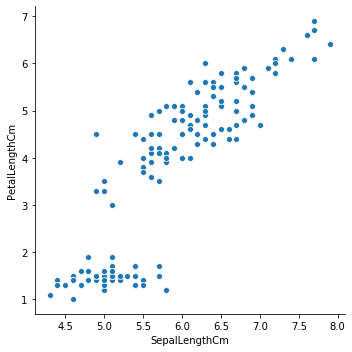

In [5]:
sns.relplot(data=iris_dataset, x='SepalLengthCm', y='PetalLengthCm')

In [6]:
# Let's set style and plot the graph again
sns.set_style(style='darkgrid')

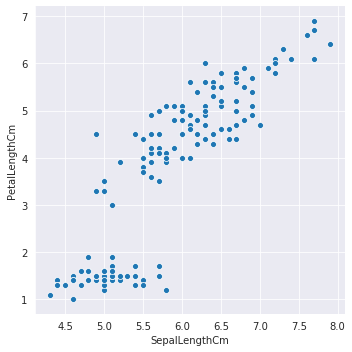

In [7]:
sns.relplot(data=iris_dataset, x='SepalLengthCm', y='PetalLengthCm')

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

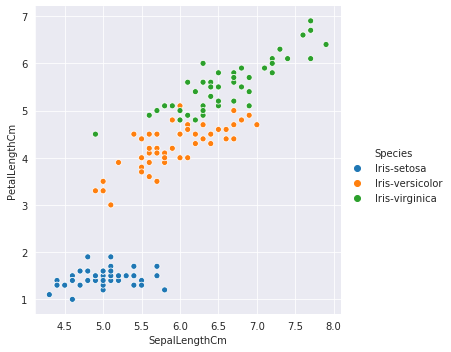

In [8]:
sns.relplot(data=iris_dataset, x='SepalLengthCm', y='PetalLengthCm', hue='Species')

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

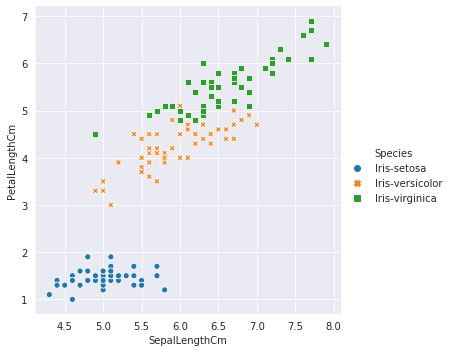

In [9]:
sns.relplot(data=iris_dataset, x='SepalLengthCm', y='PetalLengthCm', hue='Species', style= 'Species')

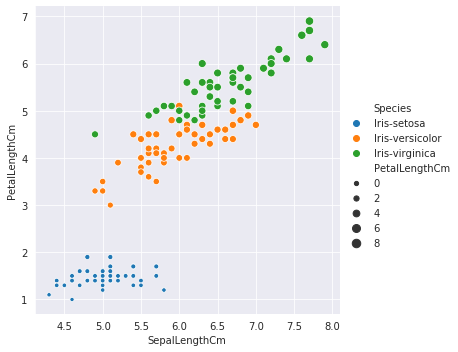

In [10]:
# The third kind of semantic variable changes the size of each point
#This will have been more easy if we have a size column
sns.relplot(data=iris_dataset, x='SepalLengthCm', y='PetalLengthCm', hue='Species', size='PetalLengthCm')

### 1.2 Emphasizing continuity with line plots

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the ```lineplot()``` function, either directly or with ```relplot()``` by setting kind="line":

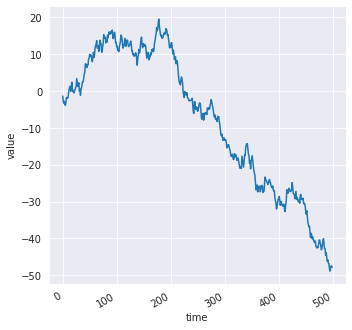

In [11]:
# Let's Define a custom Dataset with pd.DataFrame
timedata = pd.DataFrame(dict(time = np.arange(500), value = np.random.randn(500).cumsum()))

snsplot = sns.relplot(x="time", y="value", kind="line", data=timedata)

# The autofmt_xdate() method figure module which is also available in matplotlib library is
# used to rotate plots and right align them.
snsplot.fig.autofmt_xdate()

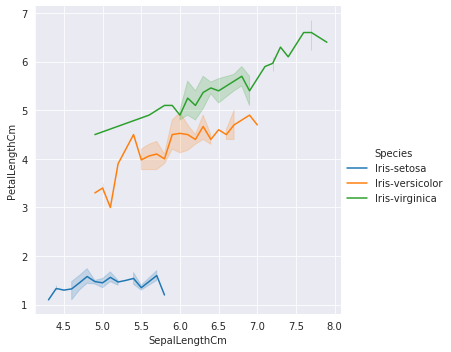

In [12]:
# You can also extend .Scatterplot() functions to lineplot

sns.relplot(data=iris_dataset, x='SepalLengthCm', y='PetalLengthCm', kind='line', hue='Species')

### 2. Plotting with categorical data

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between ```relplot()``` and either ```scatterplot()``` or ```lineplot()```, there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, ```catplot()```, that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families.
They are:

**Categorical scatterplots:**

 - ```stripplot()``` (with kind="strip"; the default)
 
 - ```swarmplot()``` (with kind="swarm")

**Categorical distribution plots:**

 - ```boxplot()``` (with kind="box")

 - ```violinplot()``` (with kind="violin")

 - ```boxenplot()``` (with kind="boxen")

**Categorical estimate plots:**

 - ```pointplot()``` (with kind="point")

 - ```barplot()``` (with kind="bar")

 - ```countplot()``` (with kind="count")
 
These families represent the data using different levels of granularity. When deciding which to use, you’ll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

We’ll mostly focus on the figure-level interface, ```catplot()```. Remember that this function is a higher-level interface each of the functions above, so we’ll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

### 2.1 Categorical scatterplots

The default representation of the data in ```catplot()``` uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by ```stripplot()```, which is the default “kind” in ```catplot()``` is to adjust the positions of points on the categorical axis with a small amount of random “jitter”:

In [13]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


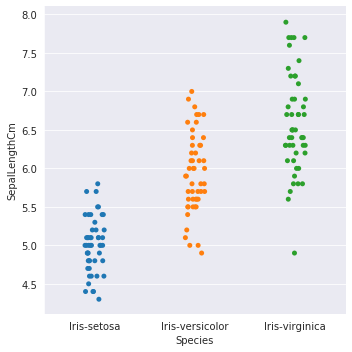

In [14]:
sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm')

In [15]:
# We can remove the darkgrid using
sns.set(style="ticks", color_codes=True)

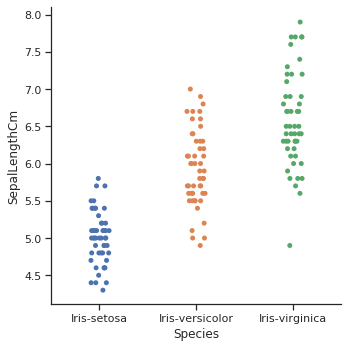

In [16]:
sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm')

The jitter parameter controls the magnitude of ```jitter``` or disables it altogether:

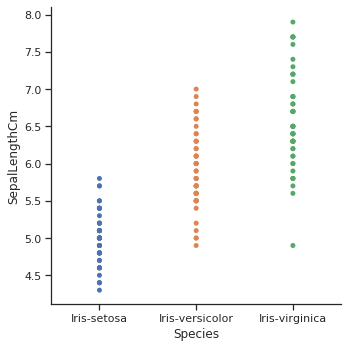

In [17]:
sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm', jitter=False)

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by ```swarmplot()```, which is activated by setting ```kind="swarm"``` in ```catplot()```:

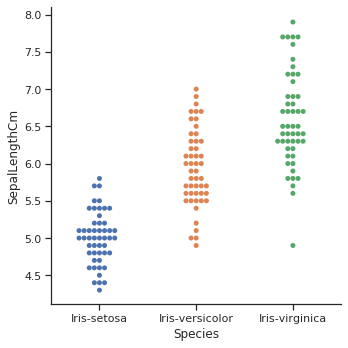

In [18]:
sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm', kind='swarm')

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

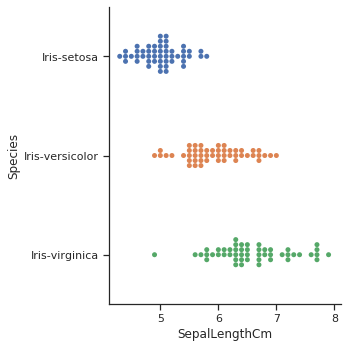

In [19]:
sns.catplot(data=iris_dataset, x='SepalLengthCm', y='Species', kind='swarm')

### 2.2 Distributions of observations within categories

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels

**Boxplots**

The first is the familiar ```boxplot()```. This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data. You can also add ```huue``` to box plot.

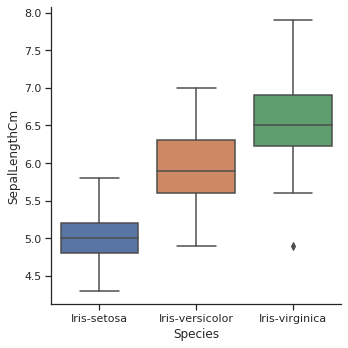

In [20]:
sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm', kind='box')

A related function, ```boxenplot()```, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

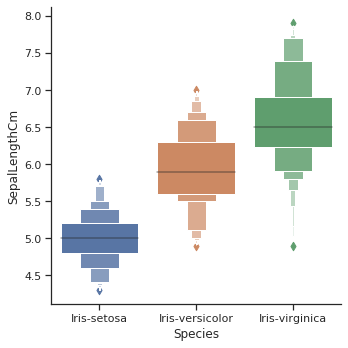

In [21]:
sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm', kind='boxen')

**Violinplots**

A different approach is a ```violinplot()```, which combines a boxplot with the kernel density estimation (KDE).
This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin

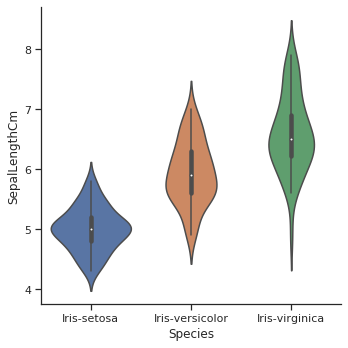

In [22]:
sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm', kind='violin')

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space.

It can also be useful to combine ```swarmplot()``` or ```striplot()``` with a box plot or violin plot to show each observation along with a summary of the distribution:

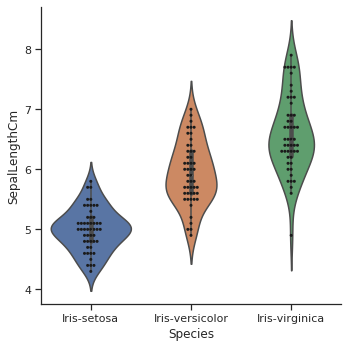

In [23]:
Violin = sns.catplot(data=iris_dataset, x='Species', y='SepalLengthCm', kind='violin')
sns.swarmplot(data=iris_dataset, x='Species', y='SepalLengthCm', color='k', size=3, ax=Violin.ax)

### 2.3 Statistical estimation within categories

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

**Bar plots**

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

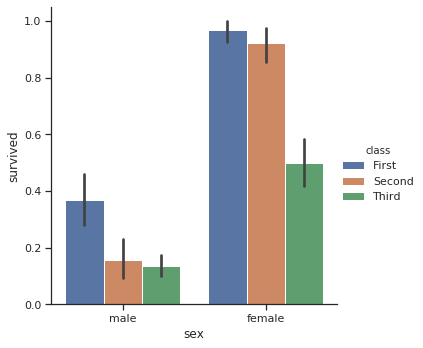

In [54]:
# Let's Load titanic dataset wich is available in Seaborn
titanic = sns.load_dataset("titanic")

sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

**Count Plot**

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the ```countplot()``` function

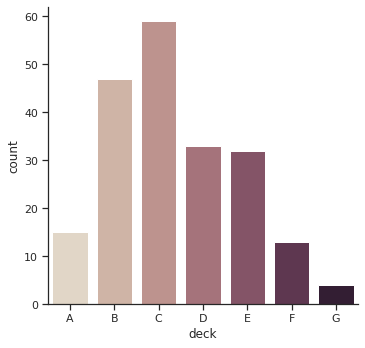

In [57]:
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25")

### 2.3 Showing multiple relationships with facets
Just like ```relplot()```, the fact that ```catplot()``` is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships:

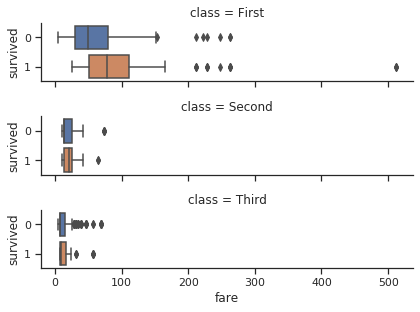

In [58]:
sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))

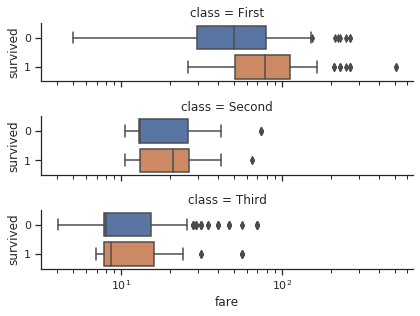

In [59]:
# Changing the Scale of the above Visualization
catplot = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))

catplot.set(xscale='log')

**Source:**

https://seaborn.pydata.org/tutorial.html